<a href="https://colab.research.google.com/github/gayoung-k/object-detection-learning-notes/blob/main/opencv_faster_rcnn_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Performing Object Detection with Faster R-CNN using the OpenCV DNN Package

* Load a pretrained model file from TensorFlow into OpenCV to perform object detection on images and videos.


In [1]:
!mkdir /content/data
!wget -O ./data/beatles01.jpg https://github.com/gayoung-k/object-detection-learning-notes/blob/main/images/beatles01.jpg?raw=true


--2025-09-04 18:42:14--  https://github.com/gayoung-k/object-detection-learning-notes/blob/main/images/beatles01.jpg?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/gayoung-k/object-detection-learning-notes/raw/refs/heads/main/images/beatles01.jpg [following]
--2025-09-04 18:42:14--  https://github.com/gayoung-k/object-detection-learning-notes/raw/refs/heads/main/images/beatles01.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gayoung-k/object-detection-learning-notes/refs/heads/main/images/beatles01.jpg [following]
--2025-09-04 18:42:14--  https://raw.githubusercontent.com/gayoung-k/object-detection-learning-notes/refs/heads/main/images/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133,

image shape: (633, 806, 3)


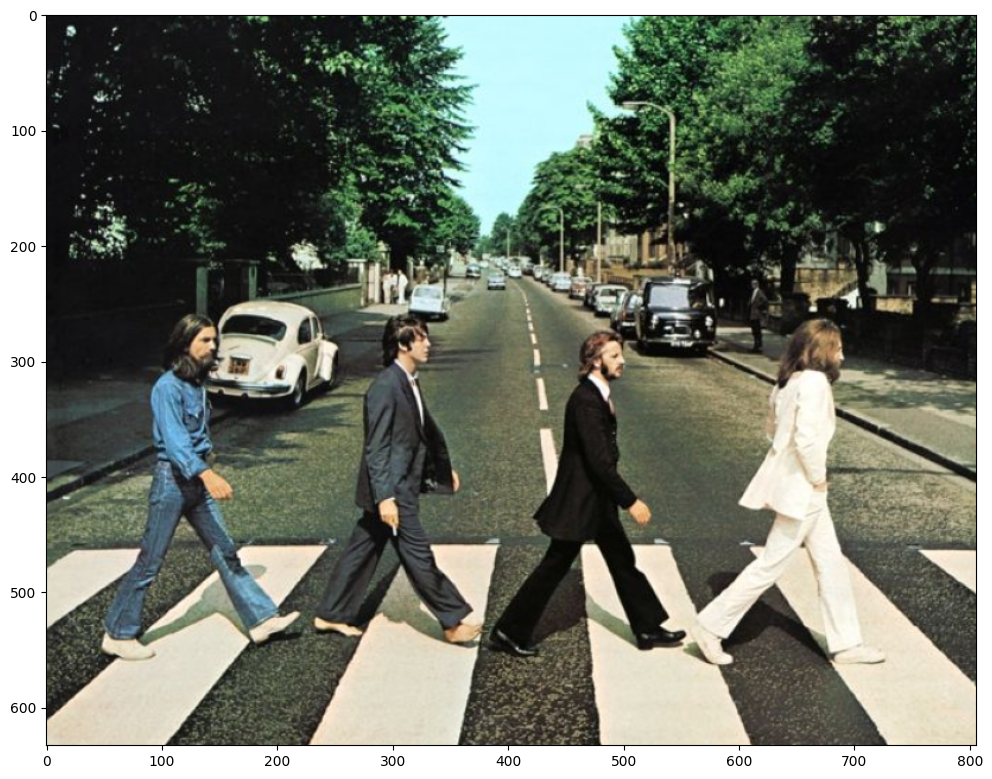

In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('./data/beatles01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print('image shape:', img_rgb.shape)
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

#### After downloading the pretrained inference model (Frozen Graph) and configuration file from TensorFlow, use them to create an inference model in OpenCV

* The download URLs are available at: [https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API](https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API)
* Download the pretrained model from: [http://download.tensorflow.org/models/object\_detection/faster\_rcnn\_resnet50\_coco\_2018\_01\_28.tar.gz](http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz) and extract it.
* Download the configuration file for the pretrained model from: [https://github.com/opencv/opencv\_extra/blob/master/testdata/dnn/faster\_rcnn\_resnet50\_coco\_2018\_01\_28.pbtxt](https://github.com/opencv/opencv_extra/blob/master/testdata/dnn/faster_rcnn_resnet50_coco_2018_01_28.pbtxt)
* Load the inference model in OpenCV DNN using the downloaded model file and configuration file as inputs.


In [3]:
!mkdir ./pretrained
!wget -O ./pretrained/faster_rcnn_resnet50_coco_2018_01_28.tar.gz http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz
!wget -O ./pretrained/config_graph.pbtxt https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/faster_rcnn_resnet50_coco_2018_01_28.pbtxt

--2025-09-04 18:43:00--  http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.2.207, 142.250.141.207, 74.125.137.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.2.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381355771 (364M) [application/x-tar]
Saving to: ‘./pretrained/faster_rcnn_resnet50_coco_2018_01_28.tar.gz’

./pretrained/faster 100%[===================>] 363.69M  15.8MB/s    in 5.8s    

2025-09-04 18:43:06 (63.0 MB/s) - ‘./pretrained/faster_rcnn_resnet50_coco_2018_01_28.tar.gz’ saved [381355771/381355771]

--2025-09-04 18:43:06--  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/faster_rcnn_resnet50_coco_2018_01_28.pbtxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent

In [4]:
!tar -xvf ./pretrained/faster*.tar.gz -C ./pretrained

faster_rcnn_resnet50_coco_2018_01_28/
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.index
faster_rcnn_resnet50_coco_2018_01_28/checkpoint
faster_rcnn_resnet50_coco_2018_01_28/pipeline.config
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.data-00000-of-00001
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.meta
faster_rcnn_resnet50_coco_2018_01_28/saved_model/
faster_rcnn_resnet50_coco_2018_01_28/saved_model/saved_model.pb
faster_rcnn_resnet50_coco_2018_01_28/saved_model/variables/
faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb


In [5]:
!pwd
!ls -lia ./pretrained/faster_rcnn_resnet50_coco_2018_01_28

/content
total 296076
1577458 drwxr-xr-x 3 345018 5000      4096 Feb  1  2018 .
1577455 drwxr-xr-x 3 root   root      4096 Sep  4 18:43 ..
1577460 -rw-r--r-- 1 345018 5000        77 Feb  1  2018 checkpoint
1577467 -rw-r--r-- 1 345018 5000 120549957 Feb  1  2018 frozen_inference_graph.pb
1577462 -rw-r--r-- 1 345018 5000 176914228 Feb  1  2018 model.ckpt.data-00000-of-00001
1577459 -rw-r--r-- 1 345018 5000     14460 Feb  1  2018 model.ckpt.index
1577463 -rw-r--r-- 1 345018 5000   5675175 Feb  1  2018 model.ckpt.meta
1577461 -rw-r--r-- 1 345018 5000      3240 Feb  1  2018 pipeline.config
1577464 drwxr-xr-x 3 345018 5000      4096 Feb  1  2018 saved_model


#### Load the TensorFlow inference model in DNN using `readNetFromTensorflow()`


In [6]:
cv_net = cv2.dnn.readNetFromTensorflow('./pretrained/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb',
                                     './pretrained/config_graph.pbtxt')

In [7]:
# OpenCV Tensorflow Faster-RCNN
labels_to_names_0 = {0:'person',1:'bicycle',2:'car',3:'motorcycle',4:'airplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',
                    10:'fire hydrant',11:'street sign',12:'stop sign',13:'parking meter',14:'bench',15:'bird',16:'cat',17:'dog',18:'horse',19:'sheep',
                    20:'cow',21:'elephant',22:'bear',23:'zebra',24:'giraffe',25:'hat',26:'backpack',27:'umbrella',28:'shoe',29:'eye glasses',
                    30:'handbag',31:'tie',32:'suitcase',33:'frisbee',34:'skis',35:'snowboard',36:'sports ball',37:'kite',38:'baseball bat',39:'baseball glove',
                    40:'skateboard',41:'surfboard',42:'tennis racket',43:'bottle',44:'plate',45:'wine glass',46:'cup',47:'fork',48:'knife',49:'spoon',
                    50:'bowl',51:'banana',52:'apple',53:'sandwich',54:'orange',55:'broccoli',56:'carrot',57:'hot dog',58:'pizza',59:'donut',
                    60:'cake',61:'chair',62:'couch',63:'potted plant',64:'bed',65:'mirror',66:'dining table',67:'window',68:'desk',69:'toilet',
                    70:'door',71:'tv',72:'laptop',73:'mouse',74:'remote',75:'keyboard',76:'cell phone',77:'microwave',78:'oven',79:'toaster',
                    80:'sink',81:'refrigerator',82:'blender',83:'book',84:'clock',85:'vase',86:'scissors',87:'teddy bear',88:'hair drier',89:'toothbrush',
                    90:'hair brush'}

#### Preprocess the image, feed it into the network, perform object detection, and visualize the results on the image


(1, 1, 100, 7)
person: 0.9998
person: 0.9996
person: 0.9993
person: 0.9970
person: 0.8995
car: 0.8922
car: 0.7602
car: 0.7415
car: 0.6929
car: 0.6918
car: 0.6896
car: 0.6717
car: 0.6521
car: 0.5730
car: 0.5679
car: 0.5261
car: 0.5012


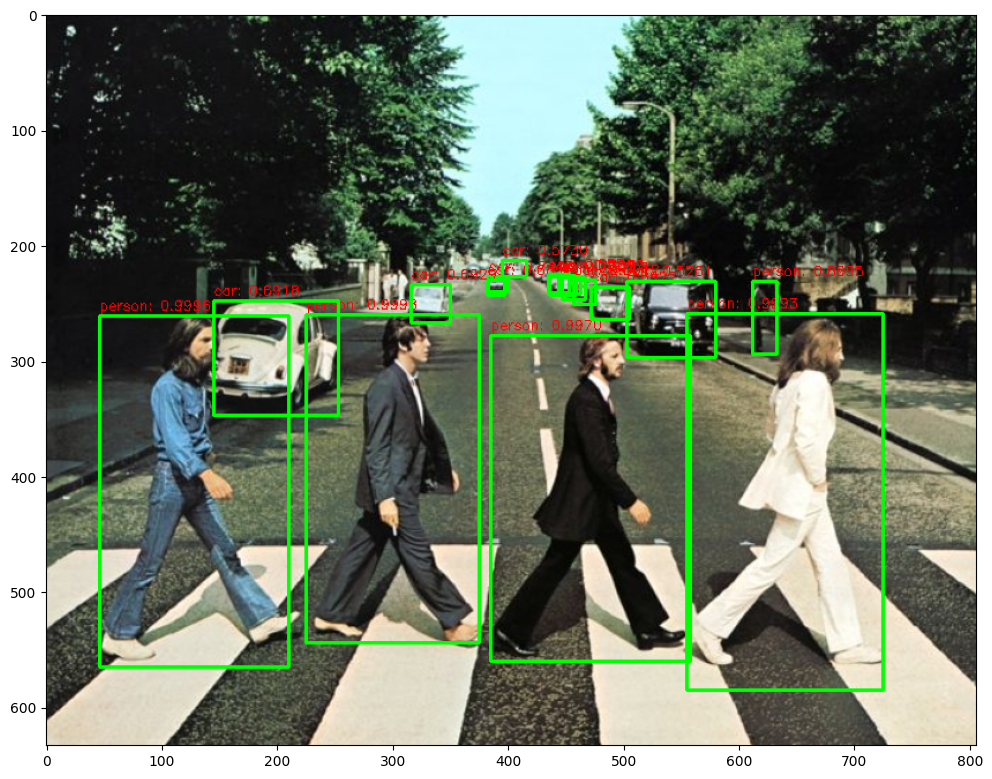

In [8]:
# When the original image is fed into the Faster R-CNN based network, it is resized.
# Since the bounding box positions are predicted based on the scaled image,
# the shape information of the original image is needed to restore them.
rows = img.shape[0]
cols = img.shape[1]

# cv2.rectangle() directly updates the passed image array with rectangles,
# so create a separate image array for drawing.
draw_img = img.copy()

# Convert the original image array from BGR to RGB before input.
# For TensorFlow Faster R-CNN, the final classification layer is not Dense,
# so the input size does not need to be fixed.
cv_net.setInput(cv2.dnn.blobFromImage(img, swapRB=True, crop=False))

# Perform object detection and return the result as cvOut.
cv_out = cv_net.forward()
print(cv_out.shape)

# Define bounding box border and caption text colors.
green_color=(0, 255, 0)
red_color=(0, 0, 255)

# Iterate over the detected objects to extract information.
# Each detection contains 7 elements, and there are 100 detections in total.
for detection in cv_out[0,0,:,:]:
    score = float(detection[2])
    class_id = int(detection[1])
    # Extract only the detected objects with a score greater than 0.5.
    if score > 0.5:
        # The detected objects are predicted based on the scaled image,
        # so recalculate their positions relative to the original image size.
        left = detection[3] * cols
        top = detection[4] * rows
        right = detection[5] * cols
        bottom = detection[6] * rows
        # Use the labels_to_names_seq dictionary to convert class_id into class names.
        caption = "{}: {:.4f}".format(labels_to_names_0[class_id], score)
        print(caption)
        # cv2.rectangle() draws a rectangle directly on the draw_img.
        # The position arguments must be integers.
        cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
        cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, 1)

# Convert the drawn image from BGR to RGB for visualization.
img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)


print(cv_out.shape)  # (1, 1, 100, 7) -> 100 represents the number of detected objects, which will later be filtered out.

#### Meaning of the 7 values
#### For detection tasks in OpenCV DNN (like Faster R-CNN, SSD, etc.), each detection is stored as a row with 7 numbers:
#### [image_id, class_id, confidence, x_min, y_min, x_max, y_max]

#### image_id → index of the image in the batch (here always 0, since batch=1).
#### class_id → predicted class label.
#### confidence → probability / score of the detection.
#### x_min, y_min, x_max, y_max → bounding box coordinates, usually normalized to [0,1].


#### Create a function for object detection on a single image


In [9]:
import time

def get_detected_img(cv_net, img_array, score_threshold, use_copied_array=True, is_print=True):

    rows = img_array.shape[0]
    cols = img_array.shape[1]

    draw_img = None
    if use_copied_array:
        draw_img = img_array.copy()
    else:
        draw_img = img_array

    cv_net.setInput(cv2.dnn.blobFromImage(img_array, swapRB=True, crop=False))

    start = time.time()
    cv_out = cv_net.forward()

    green_color=(0, 255, 0)
    red_color=(0, 0, 255)

    # Iterate through detected objects and extract information
    for detection in cv_out[0,0,:,:]:
        score = float(detection[2])
        class_id = int(detection[1])
        # Extract only objects with a score above the score_threshold passed as a function argument
        if score > score_threshold:
            # The detected objects are predicted on the scaled image,
            # so recalculate their positions relative to the original image size
            left = detection[3] * cols
            top = detection[4] * rows
            right = detection[5] * cols
            bottom = detection[6] * rows
            # Use the labels_to_names dictionary to map class_id to class names.
            # In OpenCV, class_id needs to be mapped with +1.
            caption = "{}: {:.4f}".format(labels_to_names_0[class_id], score)
            print(caption)
            # cv2.rectangle() draws a rectangle directly on draw_img.
            # Position arguments must be integers.
            cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
            cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, 1)
    if is_print:
        print('Detection time:', round(time.time() - start, 2), "seconds")

    return draw_img


image shape: (633, 806, 3)
person: 0.9998
person: 0.9996
person: 0.9993
person: 0.9970
person: 0.8995
car: 0.8922
car: 0.7602
car: 0.7415
car: 0.6929
car: 0.6918
car: 0.6896
car: 0.6717
car: 0.6521
car: 0.5730
car: 0.5679
car: 0.5261
car: 0.5012
Detection time: 3.17 seconds


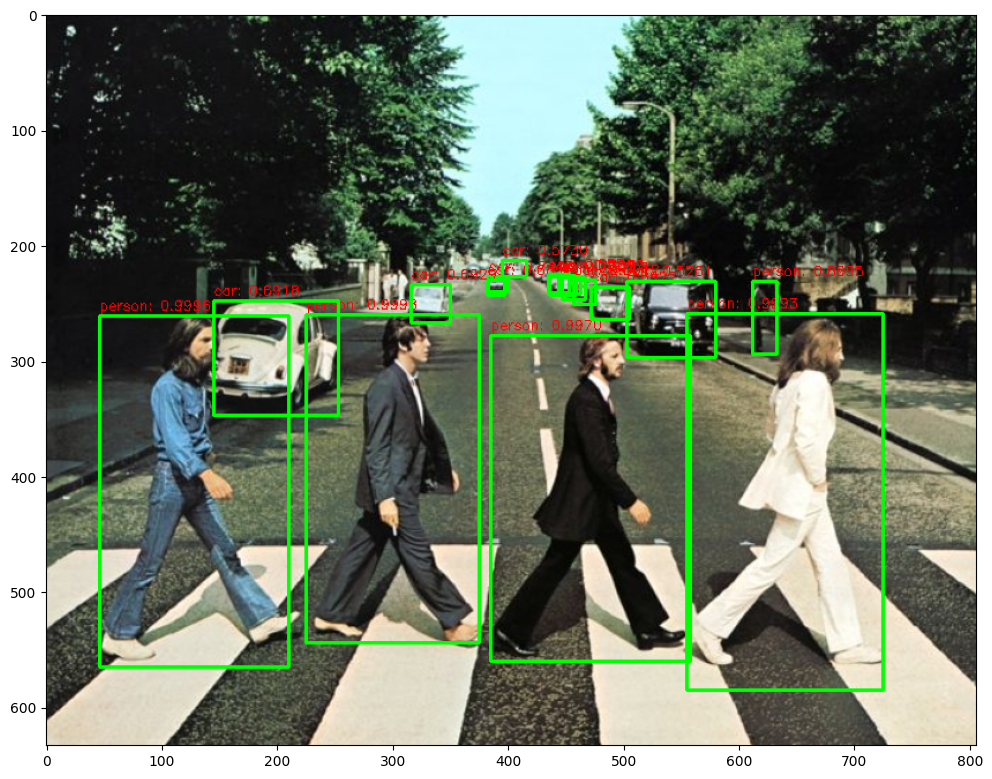

In [10]:
# load the image
img = cv2.imread('./data/beatles01.jpg')
print('image shape:', img.shape)

# load the tensorflow inference model
cv_net = cv2.dnn.readNetFromTensorflow('./pretrained/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb',
                                     './pretrained/config_graph.pbtxt')
# visualize after implementing Object Detetion
draw_img = get_detected_img(cv_net, img, score_threshold=0.5, use_copied_array=True, is_print=True)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

In [11]:
!wget -O ./data/baseball01.jpg https://github.com/gayoung-k/object-detection-learning-notes/blob/main/images/baseball01.jpg?raw=true


--2025-09-04 18:48:33--  https://github.com/gayoung-k/object-detection-learning-notes/blob/main/images/baseball01.jpg?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/gayoung-k/object-detection-learning-notes/raw/refs/heads/main/images/baseball01.jpg [following]
--2025-09-04 18:48:33--  https://github.com/gayoung-k/object-detection-learning-notes/raw/refs/heads/main/images/baseball01.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gayoung-k/object-detection-learning-notes/refs/heads/main/images/baseball01.jpg [following]
--2025-09-04 18:48:33--  https://raw.githubusercontent.com/gayoung-k/object-detection-learning-notes/refs/heads/main/images/baseball01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108

image shape: (476, 735, 3)
person: 0.9998
person: 0.9997
person: 0.9977
baseball glove: 0.9815
sports ball: 0.8867
baseball bat: 0.8420
Detection time: 4.01 seconds


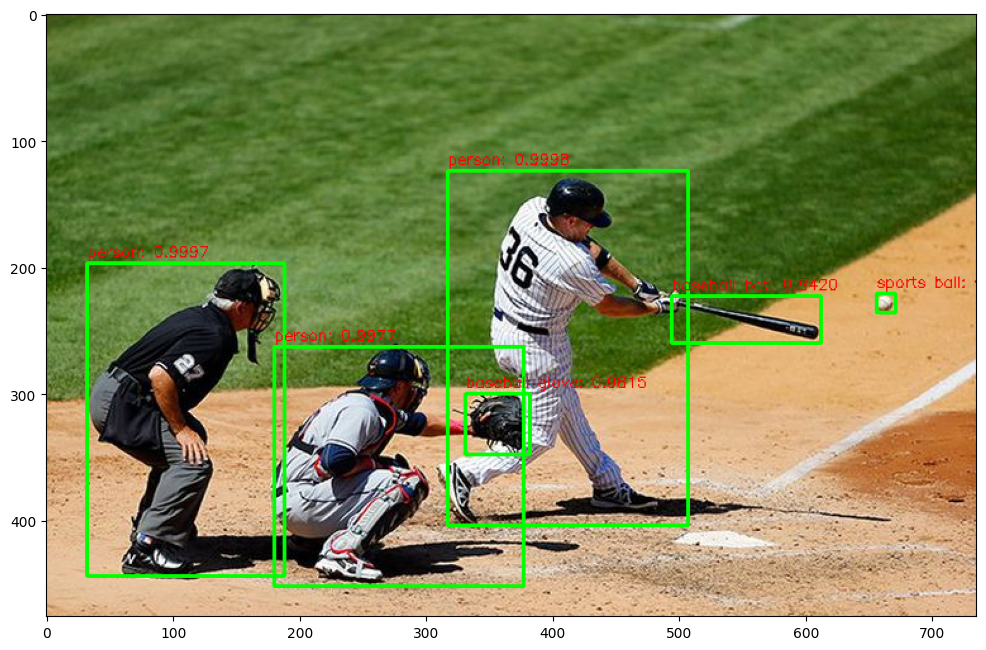

In [12]:
# load the image
img = cv2.imread('./data/baseball01.jpg')
print('image shape:', img.shape)

# load the tensorflow inference model
cv_net = cv2.dnn.readNetFromTensorflow('./pretrained/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb',
                                     './pretrained/config_graph.pbtxt')
# visualize after implementing Object Detetion
draw_img = get_detected_img(cv_net, img, score_threshold=0.5, use_copied_array=True, is_print=True)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

### Video Object Detection

In [20]:
!wget -O ./data/John_Wick_small.mp4 https://github.com/gayoung-k/object-detection-learning-notes/blob/main/videos/John_Wick_small.mp4?raw=true


--2025-09-04 18:52:26--  https://github.com/gayoung-k/object-detection-learning-notes/blob/main/videos/John_Wick_small.mp4?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/gayoung-k/object-detection-learning-notes/raw/refs/heads/main/videos/John_Wick_small.mp4 [following]
--2025-09-04 18:52:26--  https://github.com/gayoung-k/object-detection-learning-notes/raw/refs/heads/main/videos/John_Wick_small.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gayoung-k/object-detection-learning-notes/refs/heads/main/videos/John_Wick_small.mp4 [following]
--2025-09-04 18:52:26--  https://raw.githubusercontent.com/gayoung-k/object-detection-learning-notes/refs/heads/main/videos/John_Wick_small.mp4
Resolving raw.githubusercontent.com (raw.githubuserco

#### Setting up VideoCapture and VideoWriter

* Use **VideoCapture** to capture video frame by frame.
* Configure video frame size and FPS using **VideoCapture** properties.
* Set the encoding codec for **VideoWriter** and configure it for writing video output.


In [25]:
video_input_path = '/content/data/John_Wick_small.mp4'

cap = cv2.VideoCapture(video_input_path)
frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('Total Frame count:', frame_cnt)

Total Frame count: 58


In [26]:
video_input_path = '/content/data/John_Wick_small.mp4'
video_output_path = './data/John_Wick_small_cv01.mp4'

cap = cv2.VideoCapture(video_input_path)

codec = cv2.VideoWriter_fourcc(*'XVID')

vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
vid_fps = cap.get(cv2.CAP_PROP_FPS )

vid_writer = cv2.VideoWriter(video_output_path, codec, vid_fps, vid_size)

frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('Total Frame count:', frame_cnt)

Total Frame count: 58


##### Perform object detection by iterating through all frames. Similar to single-image object detection, but applied to each individual frame.


In [27]:
# Define bounding box border and caption text colors
green_color=(0, 255, 0)
red_color=(0, 0, 255)

while True:

    hasFrame, img_frame = cap.read()
    if not hasFrame:
        print('No more frames to process.')
        break

    rows = img_frame.shape[0]
    cols = img_frame.shape[1]
    # Convert the original image array from BGR to RGB before input
    cv_net.setInput(cv2.dnn.blobFromImage(img_frame, swapRB=True, crop=False))

    start = time.time()
    # Perform object detection and return the result as cv_out
    cv_out = cv_net.forward()
    frame_index = 0
    # Iterate through the detected objects and extract information
    for detection in cv_out[0,0,:,:]:
        score = float(detection[2])
        class_id = int(detection[1])
        # Extract only the detected objects with a score greater than 0.5
        if score > 0.5:
            # The detected objects are predicted based on the scaled image,
            # so recalculate their positions relative to the original image size
            left = detection[3] * cols
            top = detection[4] * rows
            right = detection[5] * cols
            bottom = detection[6] * rows
            # Use the labels_to_names_0 dictionary to map class_id to class names
            caption = "{}: {:.4f}".format(labels_to_names_0[class_id], score)
            # cv2.rectangle() draws a rectangle directly on img_frame
            # The position arguments must be integers
            cv2.rectangle(img_frame, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
            cv2.putText(img_frame, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, red_color, 1)
    print('Detection time:', round(time.time() - start, 2), 'seconds')
    vid_writer.write(img_frame)
# end of while loop

vid_writer.release()
cap.release()


Detection time: 3.05 seconds
Detection time: 3.05 seconds
Detection time: 3.33 seconds
Detection time: 3.44 seconds
Detection time: 3.23 seconds
Detection time: 3.29 seconds
Detection time: 3.86 seconds
Detection time: 3.39 seconds
Detection time: 3.34 seconds
Detection time: 3.25 seconds
Detection time: 3.21 seconds
Detection time: 3.04 seconds
Detection time: 3.38 seconds
Detection time: 3.44 seconds
Detection time: 2.99 seconds
Detection time: 3.6 seconds
Detection time: 3.54 seconds
Detection time: 3.21 seconds
Detection time: 3.04 seconds
Detection time: 3.03 seconds
Detection time: 3.44 seconds
Detection time: 3.03 seconds
Detection time: 3.01 seconds
Detection time: 3.0 seconds
Detection time: 3.38 seconds
Detection time: 3.02 seconds
Detection time: 3.02 seconds
Detection time: 3.29 seconds
Detection time: 3.17 seconds
Detection time: 3.03 seconds
Detection time: 3.0 seconds
Detection time: 3.43 seconds
Detection time: 3.01 seconds
Detection time: 3.03 seconds
Detection time: 3

#### Create a function for object detection on video

In [ ]:
def do_detected_video(cv_net, input_path, output_path, score_threshold, is_print):

    cap = cv2.VideoCapture(input_path)

    codec = cv2.VideoWriter_fourcc(*'XVID')

    vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    vid_fps = cap.get(cv2.CAP_PROP_FPS)

    vid_writer = cv2.VideoWriter(output_path, codec, vid_fps, vid_size)

    frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('Total number of frames:', frame_cnt)

    green_color=(0, 255, 0)
    red_color=(0, 0, 255)
    while True:
        hasFrame, img_frame = cap.read()
        if not hasFrame:
            print('No more frames to process.')
            break

        img_frame = get_detected_img(cv_net, img_frame, score_threshold=score_threshold, use_copied_array=False, is_print=is_print)

        vid_writer.write(img_frame)
    # end of while loop

    vid_writer.release()
    cap.release()


In [ ]:
do_detected_video(cv_net, '/content/data/John_Wick_small.mp4', './data/John_Wick_small_02.mp4', 0.2, False)